In [1]:
import matplotlib.pyplot as plt
from collections import Counter

values = [1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]
labels = [1, 2, 1, 1, 2, 1, 2, 2, 1, 2]
# swap 9 and 10
# labels = [1, 2, 1, 1, 2, 1, 2, 2, 2, 1]

P = [1.0]
R = [0.0]
TPR = [0.0]
FPR = [0.0]

for i in range(1, len(values) + 1):
    P_counter = Counter(labels[:i])
    N_counter = Counter(labels[i:])
    TP = P_counter.get(1, 0)
    FP = P_counter.get(2, 0)
    FN = N_counter.get(1, 0)
    TN = N_counter.get(2, 0)
    P.append(TP / (TP + FP))
    R.append(TP / (TP + FN))

P.append(0.0)
R.append(1.0)

AUC_PR = [0.5 * (R[i] - R[i - 1]) * (P[i] + P[i - 1]) for i in range(1, len(R))]
AUC_PR_SUM = sum(AUC_PR)
AP = [(R[i] - R[i - 1]) * P[i] for i in range(1, len(R))]
AP_SUM = sum(AP)

print('P:', ['%.4f' % f for f in P])
print('R:', ['%.4f' % f for f in R])
print('AUC_PR:', ['%.4f' % f for f in AUC_PR])
print('AUC_PR_SUM:', '%.4f' % AUC_PR_SUM)
print('AP:', ['%.4f' % f for f in AP])
print('AP_SUM:', '%.4f' % AP_SUM)


P: ['1.0000', '1.0000', '0.5000', '0.6667', '0.7500', '0.6000', '0.6667', '0.5714', '0.5000', '0.5556', '0.5000', '0.0000']
R: ['0.0000', '0.2000', '0.2000', '0.4000', '0.6000', '0.6000', '0.8000', '0.8000', '0.8000', '1.0000', '1.0000', '1.0000']
AUC_PR: ['0.2000', '0.0000', '0.1167', '0.1417', '0.0000', '0.1267', '0.0000', '0.0000', '0.1056', '0.0000', '0.0000']
AUC_PR_SUM: 0.6906
AP: ['0.2000', '0.0000', '0.1333', '0.1500', '0.0000', '0.1333', '0.0000', '0.0000', '0.1111', '0.0000', '0.0000']
AP_SUM: 0.7278


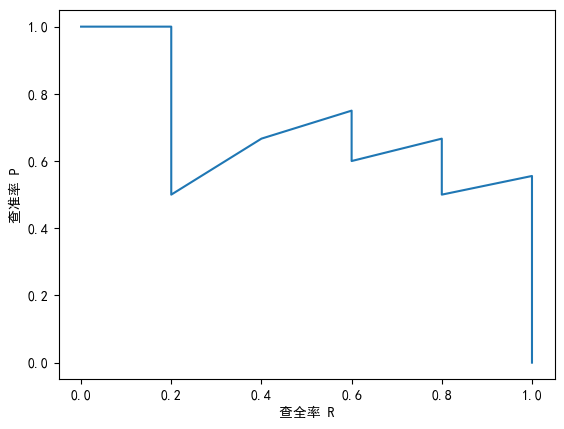

In [2]:
# 绘图
plt.rcParams["font.sans-serif"] = ["simhei"]
plt.rcParams["axes.unicode_minus"] = False

plt.plot(R, P)
plt.xlabel('查全率 R')
plt.ylabel('查准率 P')
plt.show()